<a href="https://colab.research.google.com/github/heysourin/LangGraph-Agents/blob/main/basics/03_prompt_chaining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install -q langgraph langchain dotenv langchain_openai langchain-groq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 6.8 MB/s eta 0:00:00


In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict

In [5]:
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

In [6]:
from langchain_groq import ChatGroq

model = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.0,
    max_retries=2,
    api_key = GROQ_API_KEY
    # other params...
)

In [7]:
# Create state
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [8]:
def create_outline_of_the_blog(state: BlogState)-> BlogState:
    # fetch title
    title = state['title']

    # llm to gen outline
    prompt = f'Generate a detailed outline on the blog topic: {title}'
    outline = model.invoke(prompt).content

    # update the state
    state['outline'] = outline

    return state

In [9]:
def create_content_of_the_blog(state: BlogState)-> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f"Write a detailed blog on the topic: {title} using the outline: {outline}"
    content = model.invoke(prompt).content

    state['content'] = content

    return state

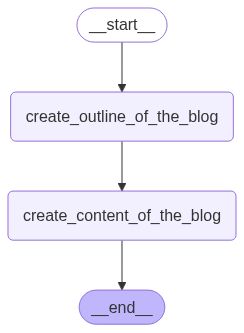

In [12]:
graph = StateGraph(BlogState)

# adding graph nodes
graph.add_node('create_outline_of_the_blog', create_outline_of_the_blog)
graph.add_node('create_content_of_the_blog', create_content_of_the_blog)

# adding edges
graph.add_edge(START, "create_outline_of_the_blog")
graph.add_edge("create_outline_of_the_blog", "create_content_of_the_blog")
graph.add_edge("create_content_of_the_blog", END)

# compile and print
workflow = graph.compile()
workflow

In [15]:
initial_state = {'title': "Explain Howard Roark from the book The Fountainhead"}

final_state = workflow.invoke(initial_state)

final_state

{'title': 'Explain Howard Roark from the book The Fountainhead',
 'outline': "**Title:** Unveiling the Enigmatic Howard Roark: A Character Analysis from Ayn Rand's The Fountainhead\n\n**I. Introduction**\n\n- Brief overview of Ayn Rand's novel The Fountainhead\n- Importance of Howard Roark as the protagonist\n- Thesis statement: Howard Roark is a complex and multifaceted character who embodies the principles of individualism, creativity, and integrity, making him a compelling and thought-provoking figure in The Fountainhead.\n\n**II. Background and Personality**\n\n- Early life and upbringing: Howard Roark's childhood and family dynamics\n- Personality traits: independence, self-reliance, and nonconformity\n- Values and principles: individualism, honesty, and integrity\n\n**III. Creative Genius and Architecture**\n\n- Roark's passion for architecture and his unique style\n- His approach to design: innovative, uncompromising, and true to his vision\n- The significance of his architectur

In [16]:
final_state['outline']

"**Title:** Unveiling the Enigmatic Howard Roark: A Character Analysis from Ayn Rand's The Fountainhead\n\n**I. Introduction**\n\n- Brief overview of Ayn Rand's novel The Fountainhead\n- Importance of Howard Roark as the protagonist\n- Thesis statement: Howard Roark is a complex and multifaceted character who embodies the principles of individualism, creativity, and integrity, making him a compelling and thought-provoking figure in The Fountainhead.\n\n**II. Background and Personality**\n\n- Early life and upbringing: Howard Roark's childhood and family dynamics\n- Personality traits: independence, self-reliance, and nonconformity\n- Values and principles: individualism, honesty, and integrity\n\n**III. Creative Genius and Architecture**\n\n- Roark's passion for architecture and his unique style\n- His approach to design: innovative, uncompromising, and true to his vision\n- The significance of his architectural creations: a reflection of his artistic expression and values\n\n**IV. Con

In [17]:
final_state['content']

"**Unveiling the Enigmatic Howard Roark: A Character Analysis from Ayn Rand's The Fountainhead**\n\nAyn Rand's novel, The Fountainhead, is a thought-provoking and philosophical exploration of individualism, creativity, and integrity. At the heart of this novel is the enigmatic and complex character of Howard Roark, a young and talented architect who embodies the principles of individualism, self-reliance, and nonconformity. This character analysis will delve into the background and personality of Howard Roark, his creative genius and architecture, conflicts and confrontations, relationships and interactions, themes and symbolism, and finally, conclude with a reflection on the enduring impact of this literary figure.\n\n**I. Introduction**\n\nPublished in 1943, The Fountainhead is a novel that explores the tension between individualism and conformity, creativity and compromise. The novel follows the story of Howard Roark, a young and ambitious architect who refuses to compromise his art